In [1]:
# Assignment 6

# Multiple Linear Regression : MLP

In [2]:
import pandas as pd

df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.isnull().sum()      # No missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [4]:
df['Age'] = df['Age_08_04']

df.drop('Age_08_04',axis=1,inplace=True)

In [5]:
df.describe()

,Price,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Age
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000
mean,10730.824513,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,55.947075
std,3626.964585,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,18.599988
min,4350.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,1.000000
25%,8450.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,44.000000
50%,9900.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,61.000000
75%,11950.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,70.000000
max,32500.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,80.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   KM         1436 non-null   int64 
 2   Fuel_Type  1436 non-null   object
 3   HP         1436 non-null   int64 
 4   Automatic  1436 non-null   int64 
 5   cc         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
 10  Age        1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


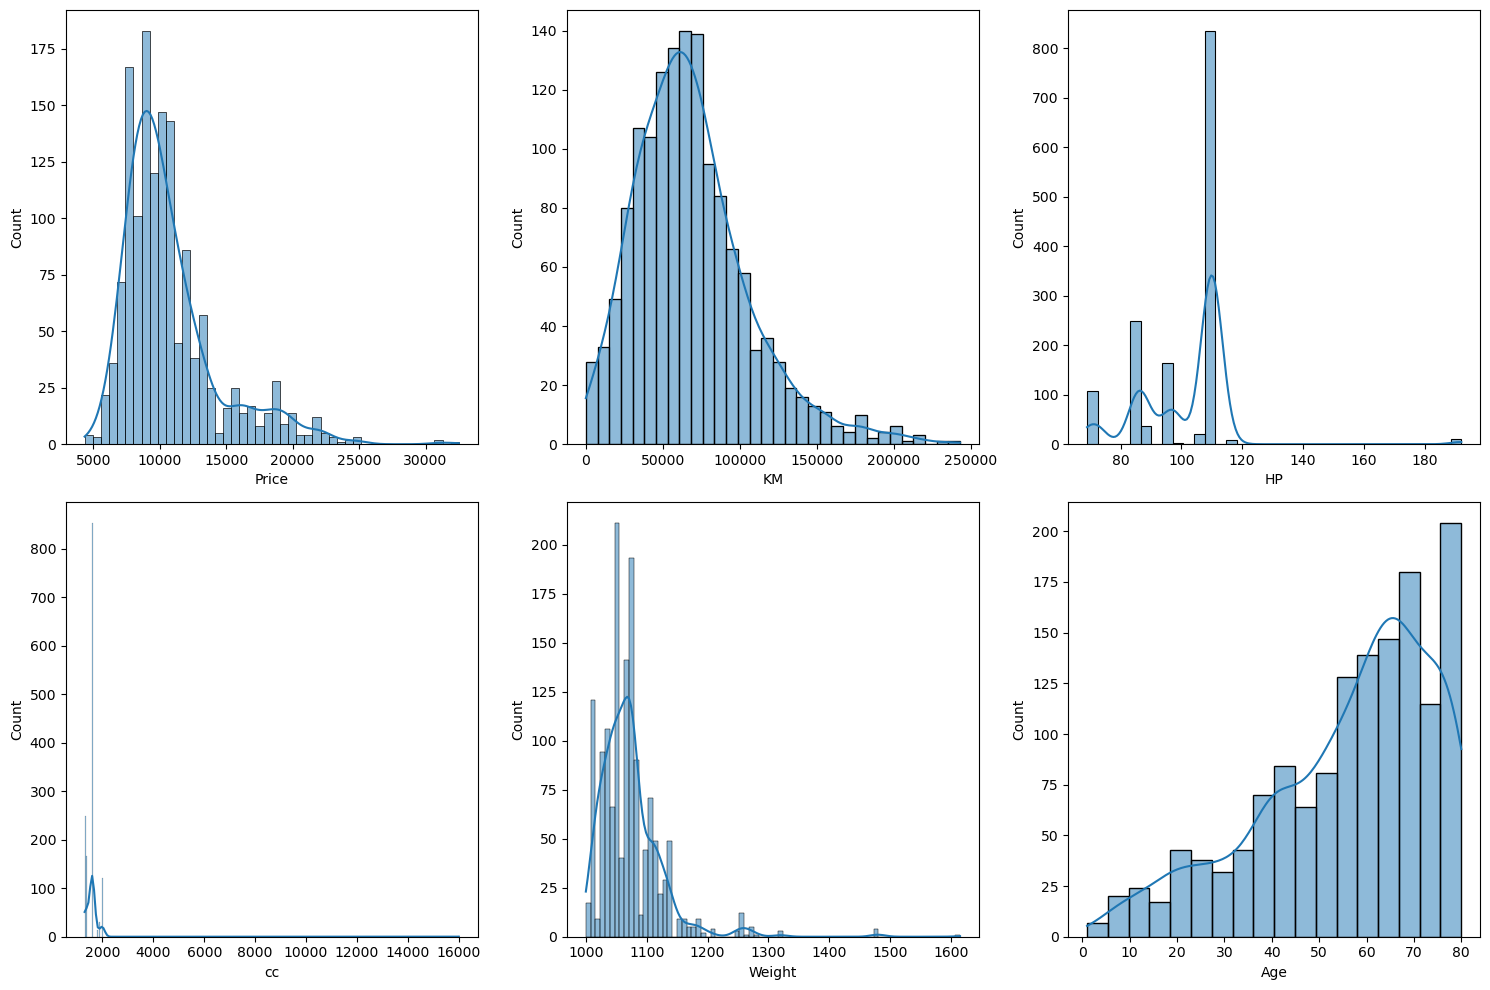

In [7]:
# plotting histogram

import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Price','KM','HP','cc','Weight','Age']

plt.figure(figsize=(15,10))

for i,col in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True)
    plt.tight_layout()

In [8]:
# Identifying & handling outliers

for col in ['Price','KM','Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = (df[col]<lower) | (df[col]>upper)
    print(outliers.sum())

    # clipping outliers
    df[col] = df[col].clip(lower,upper) 

110
49
7


In [9]:
# OneHotEncoding 'Fuel Type'

encoder = pd.get_dummies(df['Fuel_Type'],dtype=int)

df.drop('Fuel_Type',axis=1,inplace=True)

df = pd.concat([df,encoder],axis=1)

df

,Price,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Age,CNG,Diesel,Petrol
0,13500,46986.0,90,0,2000,3,4,5,1165,23,0,1,0
1,13750,72937.0,90,0,2000,3,4,5,1165,23,0,1,0
2,13950,41711.0,90,0,2000,3,4,5,1165,24,0,1,0
3,14950,48000.0,90,0,2000,3,4,5,1165,26,0,1,0
4,13750,38500.0,90,0,2000,3,4,5,1170,30,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,20544.0,86,0,1300,3,4,5,1025,69,0,0,1
1432,10845,19000.0,86,0,1300,3,4,5,1015,72,0,0,1
1433,8500,17016.0,86,0,1300,3,4,5,1015,71,0,0,1
1434,7250,16916.0,86,0,1300,3,4,5,1015,70,0,0,1


In [10]:
# separating features & target

X = df.drop('Price',axis=1)
y = df['Price']

In [11]:
# train-test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=38)

In [12]:
# preprocessing : Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# model fitting

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Elastic Net' : ElasticNet()
}
coefficients = []
intercepts = []

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_score_ = r2_score(y_test,y_pred)

    print(f'-----{name}-----')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'r2 score : {r2_score_:.2f}')

    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

-----Linear Regression-----
Mean Absolute Error : 847.27
Root Mean Squared Error : 1113.99
r2 score : 0.88
-----Lasso-----
Mean Absolute Error : 847.33
Root Mean Squared Error : 1114.24
r2 score : 0.88
-----Ridge-----
Mean Absolute Error : 847.24
Root Mean Squared Error : 1114.08
r2 score : 0.88
-----Elastic Net-----
Mean Absolute Error : 1071.61
Root Mean Squared Error : 1365.50
r2 score : 0.82


In [14]:
coef_df = pd.DataFrame(coefficients,index=['Linear Regression','Lasso','Ridge','Elastic Net'])
inter_df = pd.DataFrame(intercepts,index=['Linear Regression','Lasso','Ridge','Elastic Net'])

In [15]:
# co-efficients 
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11
Linear Regression,-510.220553,191.874011,92.582669,34.780855,58.954152,-1.705303e-13,109.673420,473.768102,-2088.817700,-38.335310,-84.387718,93.335004
Lasso,-510.363232,192.577972,91.847242,33.749412,58.202850,0.000000e+00,108.478529,472.277873,-2088.293970,-8.927037,-0.000000,179.220599
Ridge,-511.422037,192.073614,92.327364,34.810123,59.078100,0.000000e+00,109.572197,474.118397,-2086.104465,-38.238685,-84.064889,92.994433
Elastic Net,-635.580587,226.198118,41.764989,51.345480,92.612046,0.000000e+00,74.807715,483.029722,-1330.183057,-28.352971,-19.929360,28.713035


In [16]:
# intercepts
inter_df

,0
Linear Regression,10475.463415
Lasso,10475.463415
Ridge,10475.463415
Elastic Net,10475.463415


In [17]:
# using OLS

import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

model = sm.OLS(y_train,X_train_scaled).fit()

pred = model.predict(X_test_scaled)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     641.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:14:05   Log-Likelihood:                -9699.4
No. Observations:                1148   AIC:                         1.942e+04
Df Residuals:                    1137   BIC:                         1.948e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.048e+04     33.515    312.563      0.0

In [22]:
print(f"Adjusted r2 score : {model.rsquared_adj:.3f}")

Adjusted r2 score : 0.848


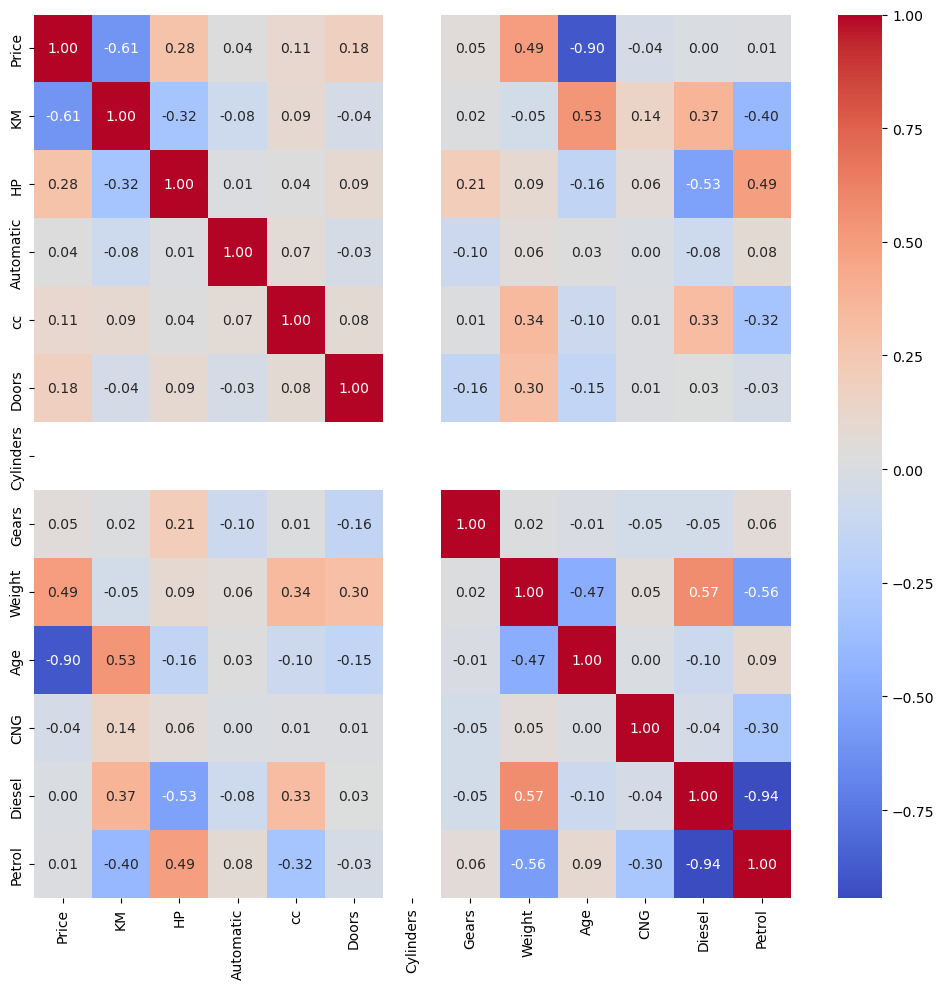

In [19]:
# checking for multicollinearity using df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.2f')
plt.tight_layout()

Interview Questions:

a. Normalization : (Min - Max scaling)

- from sklearn.preprocessing import MinMaxScaler
- ranges commonly between [0,1]
- smallest value = 0 , largest value = 1 , rest scaled proportionally in between
- Used when features have diffenrt units
- Used in KNN , K-means , NN models training usually

b. Standardization : (Z-score scaling)

- form sklearn.preprocessing import StandardScaler
- Data transformed to have mean = 0 & std = 1 ,so data is center around zero
- When data follows Normal distribution
- Used in Linear Regression, Logistic Regeression , PCA , SVM model traing


* Measuring Correlation for Multicollinearity

a. Variance Inflation Factor : (VIF)

- from statsmodels.stats.outliers import variance_inflation_factor
- 1 vs rest features
- Checks if target can be predicted by rest of features , if YES then feature is redundant
- VIF = 1 == no correlation between features & others
- VIF > 5 == moderate correlation
- VIF > 10 == Highly correalated , must be addressed

b. Correlation matrix:

- corr_matrix = df.corr()
- sns.heatmap(corr_matrix,annot=True,cmap='inferno')
- 1 vs 1 linearity relation among them